# CMS-COR-SAP. Exercise 5
By *Oleh Shkalikov*

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def mc(f, min, max, N, samp_dist, use_antithetic=False):
    #sampling 
    if(use_antithetic):
        u = stats.uniform.rvs(size=(N // 2))
        rvs = samp_dist.ppf(u)
        arvs = samp_dist.ppf(1 - u)
        rvs = np.concatenate([rvs, arvs], axis=0)
    else:
        rvs = samp_dist.rvs(size=(N))        

    # indicator    
    mask = (min <= rvs) & (rvs <= max)    
    rvs = rvs[mask]
    
    # result calcuation    
    y = f(rvs) / samp_dist.pdf(rvs)         
    return np.mean(y)

In [3]:
def mean_var(n_trials, f, min, max, N, samp_dist, use_antithetic=False, plot_box=False):
    results = np.empty(n_trials)
    for i in range(n_trials):
        results[i] = mc(f, min, max, N, samp_dist, use_antithetic)

    if plot_box:
        plt.boxplot(results)

    return np.mean(results), np.var(results, ddof=1)

## Variance of MC Integration vs Importance Sampling

Numerically compute the mean and variance of $\int\limits_0^1 x^2 dx$ using simple MC integration
with a standard uniform PDF proposal $p(x)$ and importance sampling with the proposal
PDF $q(x) = 2x$, ($0 \leq x \leq 1$). Compare the mean and variances with the analytical
solution (see lecture notes) for $N = 100$ samples.

The analytical solution is the following:
$$ 
    \int\limits_0^1 x^2 dx = \frac{x^3}{3} \Big|_0^1 = \frac{1}{3}
$$

In [4]:
f1a = lambda x: x**2

Mean 0.33014364506807004
Var 0.0007693993946516725


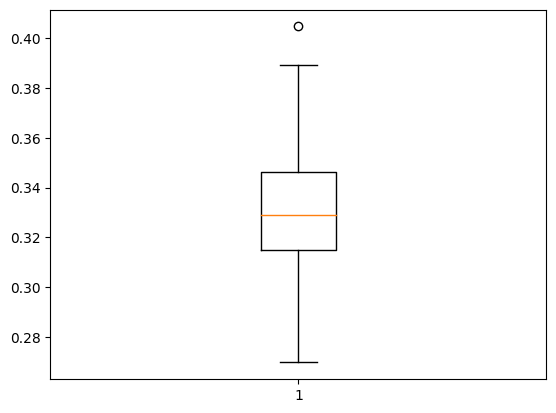

In [5]:
mean1a, var1a = mean_var(100, f1a, 0, 1, 100, stats.uniform, plot_box=True)
print(f'Mean {mean1a}')
print(f'Var {var1a}')

Mean 0.3333728954451772
Var 0.0001375587591817993


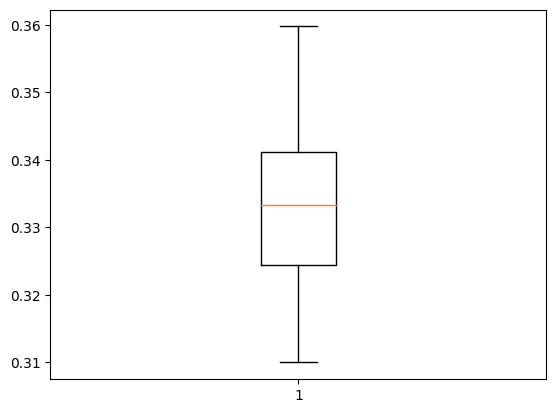

In [6]:
mean1ai, var1ai = mean_var(100, f1a, 0, 1, 100, stats.triang(c=1), plot_box=True)
print(f'Mean {mean1ai}')
print(f'Var {var1ai}')

Compute the variance from using simple MC integration with a uniform proposal distribution 
from $X \sim U(0, 10)$ and importance sampling with a normal proposal distribution
from $X \sim N(5, 4)$ to estimate $\int\limits_0^{10} (10x - x^2)dx$. Solve this problem analytically and
numerically with $N = 100$ samples for each method.

The analytical solution is the following:
$$ 
    \int\limits_0^{10} (10x - x^2)dx = 
    \left( 5x^2 - \frac{x^3}{3} \right) \Bigg|_0^{10} = 
    500 - \frac{1000}{3}
$$

In [7]:
f1b = lambda x: 10*x - x**2

Mean 166.7757342222174
Var 56.66657140314026


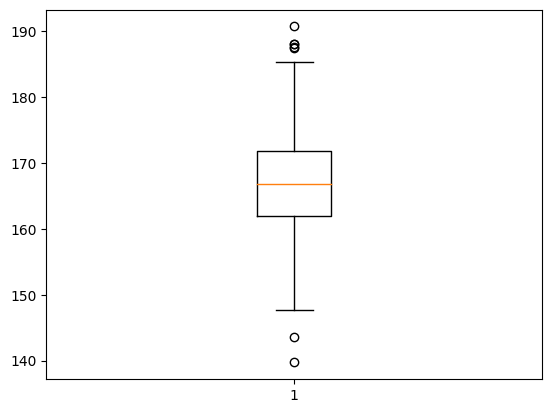

In [8]:
mean1b, var1b = mean_var(1000, f1b, 0, 10, 100, stats.uniform(loc=0, scale=10), plot_box=True)
print(f'Mean {mean1b}')
print(f'Var {var1b}')

Mean 168.85959360795906
Var 30.875396565780385


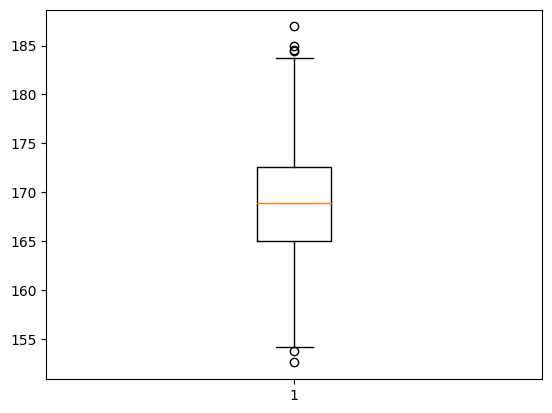

In [9]:
mean1bi, var1bi = mean_var(1000, f1b, 0, 10, 100, stats.norm(loc=5, scale=2), plot_box=True)
print(f'Mean {mean1bi}')
print(f'Var {var1bi}')

## Optimum Proposal Distribution

Find the optimum $\sigma^2$ for the proposal distribution $q(x) \sim N(0.5, \sigma^2) to estimate the integral of the PDF of $X \sim Beta(2, 2)$ from $0$ to $1$ by importance sampling. Solve this problem
numerically by scanning through $\sigma^2$ values from $0.03$ to $0.3$ in increments of $\frac{(0.3 − 0.03)}{20}$. Use $N = 1000$ samples to obtain the variances.

In [10]:
f2 = lambda x: x * stats.beta.pdf(x, 2, 2)

In [11]:
m = 20
means = np.empty(m+1)
vars = np.empty(m+1)
sigmas2 = np.empty(m+1)

for i in range(m + 1):
    sigma2 = 0.03 + ((0.3 - 0.03) / m) * i
    sampl_dist = stats.norm(loc=0.5, scale=sigma2)
    mean, var = mean_var(100, f2, 0, 1, 1000, sampl_dist)

    sigmas2[i] = sigma2
    means[i] = mean
    vars[i] = var

imin = np.argmin(vars)
print(f'Best Sigma square {sigmas2[imin]}')
print(f'Best Var {vars[imin]}')
print(f'Best Mean {means[imin]}')

Best Sigma square 0.25950000000000006
Best Var 5.1278328586037624e-05
Best Mean 0.528309124241202


<StemContainer object of 3 artists>

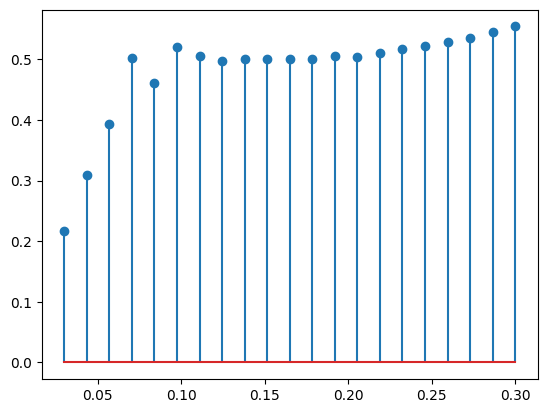

In [12]:
plt.stem(sigmas2, means)

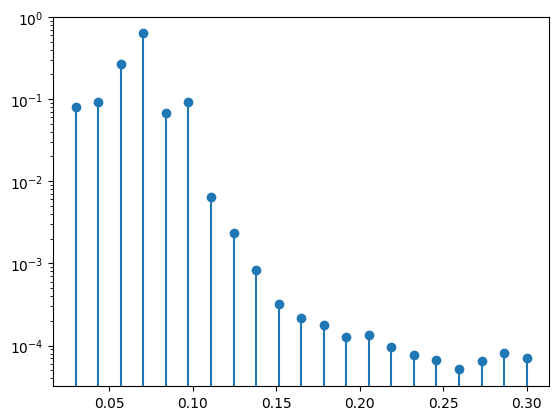

In [13]:
plt.stem(sigmas2, vars)
plt.yscale('log')

## Variance Reduction by Antithetic Variates

Estimate $ \int\limits_0^1 \frac{10}{x+1} dx $ using MC integration with $2N = 100$ samples from a uniform
proposal distribution $X \sim U(0, 1)$ and with $N = 50$ samples from $X$ together with its
antithetic variates $1 - X$. Compare the mean and variance between the two approaches from 1000 trials.

In [14]:
f3a = lambda x: 10 / (x + 1)

Mean without antithetic 6.926501530900601
Var without antithetic 0.020009045610350423


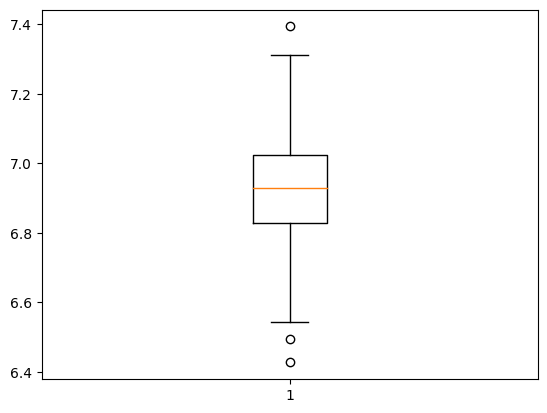

In [15]:
mean3a, var3a = mean_var(1000, f3a, 0, 1, 100, stats.uniform, use_antithetic=False, plot_box=True)
print(f'Mean without antithetic {mean3a}')
print(f'Var without antithetic {var3a}')

Mean with antithetic 6.930508928964734
Var with antithetic 0.0011267794279808284


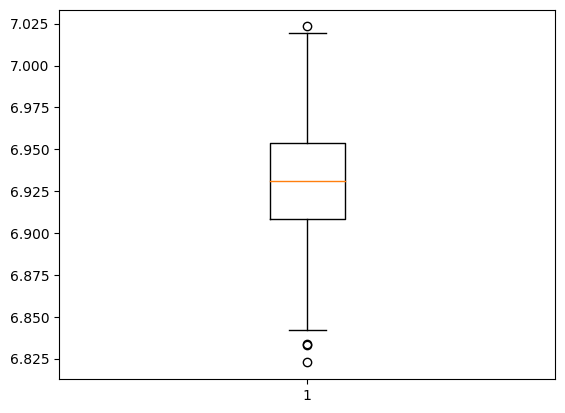

In [16]:
mean3aa, var3aa = mean_var(1000, f3a, 0, 1, 100, stats.uniform, use_antithetic=True, plot_box=True)
print(f'Mean with antithetic {mean3aa}')
print(f'Var with antithetic {var3aa}')

Estimate $ \int\limits_0^{10} (10x - x^2) dx $ by importance sampling with a proposal distribution $p(x) \sim N(5, 4)$ using antithetic variates from a uniform distribution. Use $1000$ trials and a total of $2N = 100$ samples to obtain the importance sampling variance.

Mean with antithetic 168.9463469995007
Var with antithetic 62.72329399638651


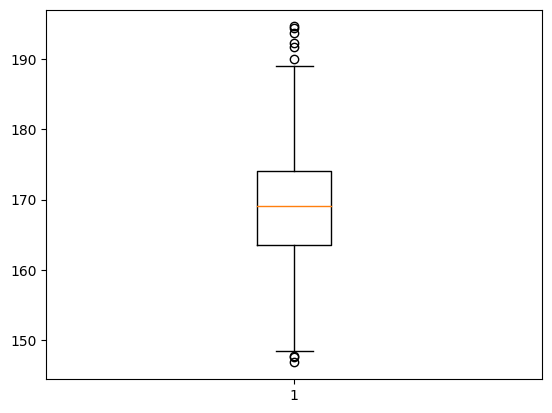

In [17]:
mean3ba, var3ba = mean_var(1000, f1b, 0, 10, 100, stats.norm(loc=5, scale=2), use_antithetic=True, plot_box=True)
print(f'Mean with antithetic {mean3ba}')
print(f'Var with antithetic {var3ba}')

As we can see the variance has increased because of covariance term in antithetic variates became lower than zero